In [2]:
from datascience import *
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

## Lecture 17 ##

## Mendel and Pea Flowers ##

In [ ]:
## Mendel had 929 plants, of which 709 had purple flowers
709 / 929

In [ ]:
predicted_proportions = make_array(.75, .25)
sample_proportions(929, predicted_proportions)

In [ ]:
def purple_flowers():
    return sample_proportions(929, predicted_proportions).item(0) * 100

In [ ]:
purple_flowers()

In [ ]:
purples = make_array()

for i in np.arange(10000):
    new_purple = purple_flowers()
    purples = np.append(purples, new_purple)

In [ ]:
Table().with_column('Percent of purple flowers in sample of 929', purples).hist()

In [ ]:
Table().with_column('Discrepancy in sample of 929 if the model is true', abs(purples- 75)).hist()

In [ ]:
(709 / 929 * 100 - 75)

## Alameda County Jury Panels ##

In [3]:
jury = Table().with_columns(
    'Ethnicity', make_array('Asian', 'Black', 'Latino', 'White', 'Other'),
    'Eligible', make_array(0.15, 0.18, 0.12, 0.54, 0.01),
    'Panels', make_array(0.26, 0.08, 0.08, 0.54, 0.04)
)

jury

Ethnicity,Eligible,Panels
Asian,0.15,0.26
Black,0.18,0.08
Latino,0.12,0.08
White,0.54,0.54
Other,0.01,0.04


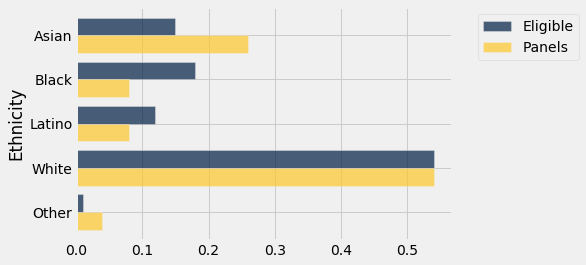

In [4]:
jury.barh('Ethnicity')

In [5]:
model = make_array(0.15, 0.18, 0.12, 0.54, 0.01)

In [6]:
simulated = sample_proportions(1423, model)
simulated

array([0.15249473, 0.19606465, 0.13070977, 0.51089248, 0.00983837])

In [11]:
jury_with_simulated = jury.with_column('Simulated', simulated)
jury_with_simulated

Ethnicity,Eligible,Panels,Simulated
Asian,0.15,0.26,0.152495
Black,0.18,0.08,0.196065
Latino,0.12,0.08,0.13071
White,0.54,0.54,0.510892
Other,0.01,0.04,0.00983837


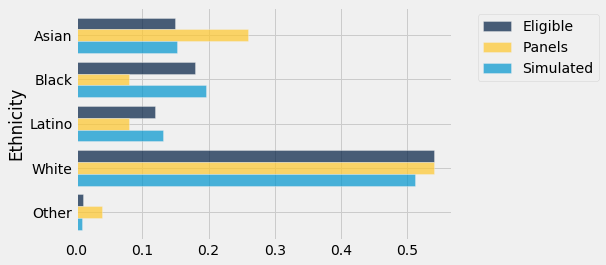

In [12]:
jury_with_simulated.barh('Ethnicity')

In [14]:
jury_with_difference = jury.with_column('Difference', jury.column('Panels') - jury.column('Eligible'))
jury_with_difference

Ethnicity,Eligible,Panels,Difference
Asian,0.15,0.26,0.11
Black,0.18,0.08,-0.1
Latino,0.12,0.08,-0.04
White,0.54,0.54,0
Other,0.01,0.04,0.03


In [15]:
def tvd(dist1, dist2):
    return sum(abs(dist1 - dist2))/2

In [16]:
tvd(jury.column('Panels'), jury.column('Eligible'))

0.14

In [24]:
tvd(sample_proportions(1423, model), jury.column('Eligible'))

0.02328179901616301

In [26]:
def simulated_tvd(size = 1423):
    return tvd(sample_proportions(size, model), model)

tvds = make_array()

for i in np.arange(10000):
    new_tvd = simulated_tvd()
    tvds = np.append(tvds, new_tvd)

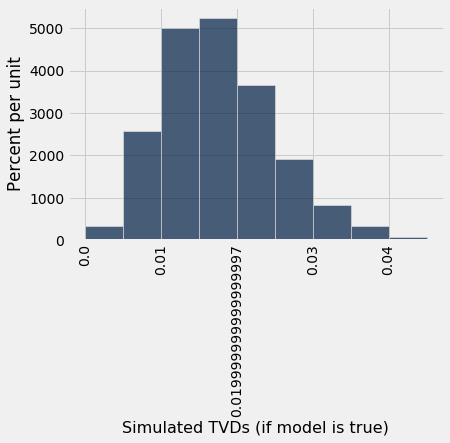

In [29]:
Table().with_column('Simulated TVDs (if model is true)', tvds).hist(bins = np.arange(0, .05, .005))